In [71]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re
from sklearn.externals import joblib
%matplotlib inline

In [72]:
data = pd.read_csv("keiba.csv",encoding="shift-jis",na_values="")
print("データの形")
print(data.shape)
data.head()

データの形
(29918, 12)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3


In [73]:
#Nullチェック
data.isnull().sum()

racekey               0
horse_number          0
horse_name            0
order_of_finish       0
popularity            0
horse_weight          0
tanshou_odds          0
hukushou_odds         0
tanshou_odds_at10     0
hukushou_odds_at10    0
IDM                   0
hot_code              0
dtype: int64

In [74]:
#raceのみを表すID
data.loc[:,"raceid"] = data.loc[:,"racekey"].str[:7]
data.head()

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code,raceid
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3,2162201
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3,2162201
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3,2162201
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3,2162201
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3,2162201


In [75]:
#該当列が数字以外の行を削除

data = data[data["order_of_finish"].str.contains("(\d)+")]
data = data[data["popularity"].str.contains("(\d)+")]
data = data[data["tanshou_odds"].str.contains("(\d)+")]
data = data[data["IDM"].str.contains("(\d)+")]
data = data[data["hot_code"].str.contains("(\d)+")]
data = data[data["tanshou_odds_at10"].str.contains("^(\d)+(?!.*\s).*$")] #正規表現よくわかってない

print(data.shape)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Use

(28348, 13)


In [76]:
#文字列を数値に変換した行を作る
data.loc[:,"order_of_finish_num"] = data.loc[:,"order_of_finish"].astype(int)
data.loc[:,"popularity_num"] = data.loc[:,"popularity"].astype(int)
data.loc[:,"horse_weight_num"] = data.loc[:,"horse_weight"].astype(int)
data.loc[:,"tanshou_odds_num"] = data.loc[:,"tanshou_odds"].astype(float)
data.loc[:,"tanshou_odds_at10_num"] = data.loc[:,"tanshou_odds_at10"].astype(float)
data.loc[:,"IDM_num"] = data.loc[:,"IDM"].astype(float)
data.loc[:,"hot_code_num"] = data.loc[:,"hot_code"].astype(float)



print(data.shape)
data.head()

(28348, 20)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,IDM,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,31,3,2162201,2,4,412,15.8,14.4,31.0,3.0
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,18,3,2162201,6,2,418,6.9,6.4,18.0,3.0
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,11,3,2162201,8,9,458,145.4,58.3,11.0,3.0
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,15,3,2162201,7,5,408,19.8,16.4,15.0,3.0
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,29,3,2162201,4,8,442,102.3,39.1,29.0,3.0


In [77]:
data =  data.loc[(data.loc[:,"popularity_num"]>=1) & (data.loc[:,"popularity_num"]<=18),:]
print(data.shape)

(28348, 20)


In [78]:
data.loc[:,"tanshou_flag"] = (data.loc[:,"order_of_finish_num"] == 1)
data.head(20)

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,hot_code,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,3,2162201,2,4,412,15.8,14.4,31.0,3.0,False
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,3,2162201,6,2,418,6.9,6.4,18.0,3.0,False
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,3,2162201,8,9,458,145.4,58.3,11.0,3.0,False
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,3,2162201,7,5,408,19.8,16.4,15.0,3.0,False
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,3,2162201,4,8,442,102.3,39.1,29.0,3.0,False
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,3,2162201,3,3,460,14.5,12.3,28.0,3.0,False
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,3,2162201,5,7,452,97.2,44.4,21.0,3.0,False
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,3,2162201,1,1,492,1.1,1.3,36.0,3.0,True
9,216220201,1310080720160710,サンポーツマス,8,9,484,61.9,10.5,21.6,6.2,...,3,2162202,8,9,484,61.9,21.6,31.0,3.0,False
10,216220202,1310451920160710,クインズジュエリー,12,8,434,24.6,4.6,18.4,4.5,...,3,2162202,12,8,434,24.6,18.4,23.0,3.0,False


In [79]:
features = ["popularity_num","horse_weight_num","tanshou_odds_at10_num","IDM_num","hot_code_num"]
target = ["tanshou_flag"]

X = data
y = data.loc[:,target]
print("デザインマトリックスの形")
print(X.shape)
print("ラベルマトリックス")
print(y.shape)

デザインマトリックスの形
(28348, 21)
ラベルマトリックス
(28348, 1)


In [80]:
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("トレインデータ")
print(data_train.shape)
print(y_train.shape)
print("テストデータ")
print(data_test.shape)
print(y_test.shape)

トレインデータ
(22678, 21)
(22678, 1)
テストデータ
(5670, 21)
(5670, 1)


In [81]:
#学習に使う列だけ選択
X_train = data_train.loc[:,features]
X_test = data_test.loc[:,features]

In [82]:
#DataFrameのまま扱うとindexが保持されて便利
X_train.head()

,popularity_num,horse_weight_num,tanshou_odds_at10_num,IDM_num,hot_code_num
7106,12,460,53.1,35.0,3.0
18781,4,490,7.6,47.0,3.0
459,6,494,15.1,55.0,3.0
27881,5,462,11.6,40.0,3.0
3526,6,438,8.8,42.0,3.0


In [ ]:
#tutrial http://scikit-learn.org/stable/modules/svm.html
# SVC()の説明　http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
clf = svm.SVC()
clf.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
joblib.dump(clf, 'clf.pkl') 

In [13]:
clf = joblib.load('clf.pkl') 

In [14]:
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print("train dataのscore:", train_score)
print("test dataのscore:", test_score)

train dataのscore: 0.951583032013
test dataのscore: 0.929805996473


In [15]:
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)

In [16]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    22167
True       511
dtype: int64
test data の　予測の内訳
False    5619
True       51
dtype: int64


In [17]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[21090    21]
 [ 1077   490]]
confusion_matrix in test
[[5248   27]
 [ 371   24]]


In [18]:

tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.958904109589
テストデータでの精度＝ 0.470588235294


In [19]:

data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
print(data_train.shape)


(22678, 22)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
print(data_test.shape)

(5670, 22)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
print(data_train_T.shape)

(1567, 22)


In [22]:
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]
print(data_train_TP.shape)

(490, 22)


In [23]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 13.259491193737771


In [24]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(395, 22)
(24, 22)
test dataの回収率は 1.0647058823529412


In [25]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,race,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict
20781,515140616,1010435320150208,クロムレック,1,1,538,2.2,1.2,2.6,1.3,...,5151406,1,1,538,2.2,2.6,52.0,3.0,True,True
18820,615360303,1210622820150412,レッドカノーヴァ,1,1,470,1.1,1,1.2,1,...,6153603,1,1,470,1.1,1.2,38.0,3.0,True,True
12825,916250412,1310602520160409,エルプシャフト,1,1,438,2.2,1.2,1.9,1.1,...,9162504,1,1,438,2.2,1.9,43.0,3.0,True,True
12366,1016260906,1311000820160814,リッチーリッチー,1,2,512,2.3,1.1,2.3,1.1,...,1016260,1,2,512,2.3,2.3,54.0,3.0,True,True
3945,516561007,1110396420161120,ディアデルレイ,1,1,506,3.3,1.4,4.3,1.1,...,5165610,1,1,506,3.3,4.3,65.0,3.0,True,True
20976,815240712,1010481520150208,ラローザブル,1,1,518,2.4,1.2,2.8,1.3,...,8152407,1,1,518,2.4,2.8,56.0,3.0,True,True
5544,616430114,1410446820160917,ブルーヘヴン,1,1,484,1.9,1.1,2,1.1,...,6164301,1,1,484,1.9,2.0,40.0,3.0,True,True
16475,916141202,1210142120160306,オヒア,1,2,456,4.6,1.5,2.7,2.2,...,9161412,1,2,456,4.6,2.7,59.0,3.0,True,True
28190,715320501,1310566220150705,ロスカボス,1,2,496,2.8,1.1,3.5,1.2,...,7153205,1,2,496,2.8,3.5,41.0,3.0,True,True
5378,916550202,1410900820161217,ブルベアラクーン,1,1,528,1.7,1.1,1.8,1.1,...,9165502,1,1,528,1.7,1.8,51.0,3.0,True,True


In [32]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid = {'C': [1], 'gamma': [0.1],"class_weight":[{1:10},{1:11},{1:12},{1:13},{1:14},{1:15},{1:16}]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1], 'gamma': [0.1], 'class_weight': [{1: 10}, {1: 11}, {1: 12}, {1: 13}, {1: 14}, {1: 15}, {1: 16}]}


In [34]:
clf = svm.SVC(probability = True)

to do:scoringを回収率にしたいので，関数を自作せねばならない

In [35]:
grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="precision",verbose=3,n_jobs=-1)

In [36]:
grid_search.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 36.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1], 'gamma': [0.1], 'class_weight': [{1: 10}, {1: 11}, {1: 12}, {1: 13}, {1: 14}, {1: 15}, {1: 16}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=3)

In [38]:
joblib.dump(grid_search, 'gs.pkl') 

['gs.pkl']

In [26]:
grid_search = joblib.load('gs.pkl') 

In [27]:
result = pd.DataFrame(grid_search.cv_results_)
print(result.shape)
result

(7, 23)


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_class_weight,param_gamma,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,231.494041,2.965170,0.238213,0.518794,1,{1: 10},0.1,"{'C': 1, 'class_weight': {1: 10}, 'gamma': 0.1}",6,0.261364,...,0.218750,0.529114,0.243590,0.505446,0.240079,0.524927,38.254398,0.978844,0.014608,0.008169
1,235.159450,2.960569,0.238213,0.517355,1,{1: 11},0.1,"{'C': 1, 'class_weight': {1: 11}, 'gamma': 0.1}",5,0.262664,...,0.216912,0.527778,0.244080,0.502404,0.240557,0.524467,71.487864,0.975363,0.015626,0.008804
2,225.856118,2.501743,0.238641,0.516651,1,{1: 12},0.1,"{'C': 1, 'class_weight': {1: 12}, 'gamma': 0.1}",1,0.263060,...,0.216912,0.527778,0.246824,0.500399,0.239130,0.523591,33.387998,0.090064,0.015906,0.009363
3,236.077303,2.944568,0.238185,0.516227,1,{1: 13},0.1,"{'C': 1, 'class_weight': {1: 13}, 'gamma': 0.1}",7,0.262570,...,0.216514,0.527778,0.245902,0.500199,0.238659,0.523154,73.304970,0.983863,0.015769,0.009395
4,209.403377,2.470141,0.238459,0.516358,1,{1: 14},0.1,"{'C': 1, 'class_weight': {1: 14}, 'gamma': 0.1}",2,0.262570,...,0.216514,0.527778,0.247273,0.500199,0.238659,0.523810,24.527605,0.046727,0.015912,0.009495
5,243.683338,3.487199,0.238459,0.516270,1,{1: 15},0.1,"{'C': 1, 'class_weight': {1: 15}, 'gamma': 0.1}",2,0.262570,...,0.216514,0.527556,0.247273,0.500199,0.238659,0.523591,53.833897,1.215153,0.015912,0.009408
6,211.424493,2.533545,0.238459,0.516270,1,{1: 16},0.1,"{'C': 1, 'class_weight': {1: 16}, 'gamma': 0.1}",2,0.262570,...,0.216514,0.527556,0.247273,0.500199,0.238659,0.523591,13.948272,0.211136,0.015912,0.009408


In [28]:
filename = str(param_grid)
print(filename)

NameError: name 'param_grid' is not defined

In [29]:
result.to_csv("gs_result1.csv")

In [30]:
param = grid_search.best_params_
param

{'C': 1, 'class_weight': {1: 12}, 'gamma': 0.1}

In [31]:
train_y_pred = grid_search.predict(X_train)
test_y_pred = grid_search.predict(X_test)

In [32]:
print("train data の　予測の内訳")
print(pd.Series(train_y_pred).value_counts())
print("test data の　予測の内訳")
print(pd.Series(test_y_pred).value_counts())

train data の　予測の内訳
False    19408
True      3270
dtype: int64
test data の　予測の内訳
False    4965
True      705
dtype: int64


In [33]:
print("confusion_matrix in train")
print(confusion_matrix(y_train,train_y_pred))
print("confusion_matrix in test")
print(confusion_matrix(y_test,test_y_pred))

confusion_matrix in train
[[19408  1703]
 [    0  1567]]
confusion_matrix in test
[[4748  527]
 [ 217  178]]


In [34]:
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()
print("トレインデータでの精度＝",tp/(tp+fp))
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print("テストデータでの精度＝",tp/(tp+fp))

トレインデータでの精度＝ 0.479204892966
テストデータでの精度＝ 0.252482269504


In [35]:
data_train.loc[:,"predict"] = pd.Series(train_y_pred,index=data_train.index)
data_test.loc[:,"predict"] = pd.Series(test_y_pred,index=data_test.index)
data_train_T = data_train.loc[data_train["tanshou_flag"] == True,:]
data_train_TP = data_train_T.loc[data_train_T["predict"] == True,:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
train_kaisyuuritu = data_train_TP["tanshou_odds_num"].sum()/(data_train.loc[data_train["predict"]==True,:].shape[0])
print("train dataの回収率は",train_kaisyuuritu)

train dataの回収率は 5.389602446483178


In [37]:
data_test_T = data_test.loc[data_test["tanshou_flag"] == True,:]
print(data_test_T.shape)
data_test_TP = data_test_T.loc[data_test_T["predict"] == True,:]
print(data_test_TP.shape)
test_kaisyuuritu = data_test_TP["tanshou_odds_num"].sum()/(data_test.loc[data_test["predict"]==True,:].shape[0])
print("test dataの回収率は",test_kaisyuuritu)

(395, 22)
(178, 22)
test dataの回収率は 1.1998581560283685


In [38]:
data_test_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,race,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict
20781,515140616,1010435320150208,クロムレック,1,1,538,2.2,1.2,2.6,1.3,...,5151406,1,1,538,2.2,2.6,52.0,3.0,True,True
18820,615360303,1210622820150412,レッドカノーヴァ,1,1,470,1.1,1,1.2,1,...,6153603,1,1,470,1.1,1.2,38.0,3.0,True,True
13898,516290503,1310575420160521,クラウンマグマ,1,1,462,1.7,1.1,1.7,1.1,...,5162905,1,1,462,1.7,1.7,45.0,3.0,True,True
12825,916250412,1310602520160409,エルプシャフト,1,1,438,2.2,1.2,1.9,1.1,...,9162504,1,1,438,2.2,1.9,43.0,3.0,True,True
8468,1016151209,1210568920160227,リッパーザウィン,1,2,508,4.1,1.5,6.6,2.1,...,1016151,1,2,508,4.1,6.6,54.0,3.0,True,True
20881,815240107,1210158320150208,ヤマノルミナス,1,4,456,7.1,1.6,11.5,2.1,...,8152401,1,4,456,7.1,11.5,35.0,3.0,True,True
18157,515150604,1210622620150214,トゥルッリ,1,9,476,31.8,4.5,16.5,3.9,...,5151506,1,9,476,31.8,16.5,54.0,3.0,True,True
12366,1016260906,1311000820160814,リッチーリッチー,1,2,512,2.3,1.1,2.3,1.1,...,1016260,1,2,512,2.3,2.3,54.0,3.0,True,True
24944,915320311,1210561320150607,トップリバティ,1,1,514,2.8,1.2,4.2,1.2,...,9153203,1,1,514,2.8,4.2,40.0,3.0,True,True
15264,516320107,1310640920160605,レディーゴー,1,1,480,3.5,1.4,3.5,1.4,...,5163201,1,1,480,3.5,3.5,37.0,3.0,True,True


確率を出力するhttp://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [39]:
tr_predict_proba = grid_search.predict_proba(X_train)
tr_predict_proba

array([[ 0.95405007,  0.04594993],
       [ 0.89010058,  0.10989942],
       [ 0.95410835,  0.04589165],
       ..., 
       [ 0.95280051,  0.04719949],
       [ 0.9571745 ,  0.0428255 ],
       [ 0.93905762,  0.06094238]])

In [40]:
tr_predict = grid_search.predict(X_train)
tr_predict

array([False, False, False, ..., False, False, False], dtype=bool)

In [41]:
te_predict_proba = grid_search.predict_proba(X_test)
te_predict_proba

array([[ 0.95621479,  0.04378521],
       [ 0.96331998,  0.03668002],
       [ 0.95258723,  0.04741277],
       ..., 
       [ 0.64680581,  0.35319419],
       [ 0.71106472,  0.28893528],
       [ 0.94952634,  0.05047366]])

In [42]:
te_predict = grid_search.predict(X_test)
te_predict

array([False, False, False, ...,  True,  True, False], dtype=bool)

In [43]:
df_tr_proba = pd.DataFrame(tr_predict_proba)
df_tr_proba

,0,1
0,0.954050,0.045950
1,0.890101,0.109899
2,0.954108,0.045892
3,0.972004,0.027996
4,0.982452,0.017548
5,0.952820,0.047180
6,0.953343,0.046657
7,0.966502,0.033498
8,0.952833,0.047167
9,0.954840,0.045160


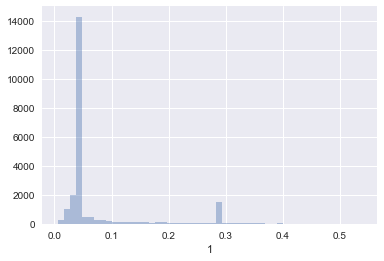

In [44]:
sns.distplot(df_tr_proba.loc[:,1],kde=None)

In [45]:
#予想がPのインスタンスのクラス所属確率
df_tr_proba.index = data_train.index.values[:22678]
df_tr_proba.loc[tr_predict,:]

,0,1
14194,0.711554,0.288446
22396,0.711586,0.288414
29167,0.711495,0.288505
14003,0.711525,0.288475
12843,0.864175,0.135825
19032,0.711405,0.288595
12238,0.872332,0.127668
8943,0.711493,0.288507
20472,0.711436,0.288564
16676,0.711477,0.288523


In [46]:
data_train.loc[:,"tanshou_proba"] = df_tr_proba.loc[:,1]
print(data_train.shape)
data_train.head()

(22678, 23)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba
7106,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,7,12,460,109.0,53.1,35.0,3.0,False,False,0.045950
18781,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,12,4,490,8.3,7.6,47.0,3.0,False,False,0.109899
459,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,4,6,494,13.4,15.1,55.0,3.0,False,False,0.045892
27881,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,8,5,462,16.9,11.6,40.0,3.0,False,False,0.027996
3526,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,10,6,438,15.9,8.8,42.0,3.0,False,False,0.017548


In [47]:
data_train.loc[:,"tanshou_odds*tanshou_proba"] = data_train["tanshou_odds_num"] * data_train["tanshou_proba"]
data_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
7106,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,12,460,109.0,53.1,35.0,3.0,False,False,0.045950,5.008542
18781,315121212,1111005920150412,シンガン,12,4,490,8.3,2.5,7.6,2.2,...,4,490,8.3,7.6,47.0,3.0,False,False,0.109899,0.912165
459,716341005,1310565220160710,サトノエトワール,4,6,494,13.4,3.1,15.1,3.5,...,6,494,13.4,15.1,55.0,3.0,False,False,0.045892,0.614948
27881,215160612,1110261320150705,タマモエスカルゴ,8,5,462,16.9,2.3,11.6,2.4,...,5,462,16.9,11.6,40.0,3.0,False,False,0.027996,0.473125
3526,816470701,1310034020161023,シルバーメール,10,6,438,15.9,3.1,8.8,3.3,...,6,438,15.9,8.8,42.0,3.0,False,False,0.017548,0.279014


In [48]:
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>1,:]
print(tr_kaime.shape)
tr_kaime

(13663, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
7106,04162a0311,1310911220160828,テンエイロータス,7,12,460,109,12.9,53.1,7.6,...,12,460,109.0,53.1,35.0,3.0,False,False,0.045950,5.008542
12130,416260517,1410312220160814,トランプカード,7,6,444,35.5,5.1,35.1,4.5,...,6,444,35.5,35.1,24.0,3.0,False,False,0.047180,1.674875
28451,515181002,910375920150222,ロジサンデー,11,12,476,121.8,14.8,55.7,7.7,...,12,476,121.8,55.7,52.0,3.0,False,False,0.046657,5.682772
16758,515420602,1110200320151011,リースリング,5,13,458,64,7.8,28,5.1,...,13,458,64.0,28.0,44.0,3.0,False,False,0.033498,2.143900
4769,616420807,1310454720160911,ゴールデンレッグ,13,12,446,148.6,19.7,81.7,12.1,...,12,446,148.6,81.7,30.0,3.0,False,False,0.047167,7.009043
25369,715410802,1110438820151205,マンオブグァテマラ,12,11,474,43.1,6.8,29.4,4.1,...,11,474,43.1,29.4,47.0,3.0,False,False,0.045160,1.946393
15793,616151214,1110540120160116,フィリグラーナ,12,14,446,197.8,23.3,56.7,7,...,14,446,197.8,56.7,48.0,3.0,False,False,0.046354,9.168833
19386,515250506,1210080220150509,スペシャルヴォーグ,16,14,436,230.4,39,67.9,17.9,...,14,436,230.4,67.9,12.0,3.0,False,False,0.047203,10.875517
3727,316360812,1310437820161120,パルパルパンダ,8,9,472,42.4,6.2,25.6,7.8,...,9,472,42.4,25.6,43.0,3.0,False,False,0.029421,1.247430
22506,715240711,1110175520150322,ローエンイェーガー,11,14,528,192.9,28.7,81,9,...,14,528,192.9,81.0,32.0,3.0,False,False,0.047158,9.096784


In [49]:
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
print(tr_kaime_TP.shape)
tr_kaime_TP.head()

(1100, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
22396,615281210,1110464920150322,ゼンノヒストリエ,1,3,506,7.2,2.1,7.9,2.9,...,3,506,7.2,7.9,56.0,3.0,True,True,0.288414,2.076580
19032,915260511,1010410520150412,ヒドゥンブレイド,1,5,492,10,2.8,10.6,2.5,...,5,492,10.0,10.6,53.0,3.0,True,True,0.288595,2.885949
20472,915111108,1210468520150228,ヤングマンパワー,1,9,522,34.8,5.9,24.4,4.2,...,9,522,34.8,24.4,53.0,3.0,True,True,0.288564,10.042011
28279,715321106,1010404220150705,ウリウリ,1,2,468,5.1,1.8,5.8,2.2,...,2,468,5.1,5.8,69.0,3.0,True,True,0.288485,1.471273
2624,516150306,1310569820160213,エリモグレイス,1,2,500,3.5,1.4,4.9,1.4,...,2,500,3.5,4.9,43.0,3.0,True,True,0.288431,1.009508


In [50]:
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print(train_kaisyuuritu)

1.2085705921100787


In [51]:
df_te_proba = pd.DataFrame(te_predict_proba)
df_te_proba.index = data_test.index.values[:5670]
print(df_te_proba.shape)
df_te_proba.head()

(5670, 2)


,0,1
725,0.956215,0.043785
29720,0.963320,0.036680
17903,0.952587,0.047413
8353,0.960230,0.039770
9609,0.960366,0.039634


In [52]:
print(df_te_proba.loc[te_predict,:].shape)
df_te_proba.loc[te_predict,:].head()

(705, 2)


,0,1
16971,0.736228,0.263772
6287,0.841580,0.158420
23988,0.755440,0.244560
667,0.719002,0.280998
12557,0.744886,0.255114


In [53]:
data_test.loc[:,"tanshou_proba"] = df_te_proba.loc[:,1]
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba
725,516230409,1310486820160430,クインズクオーツ,7,4,438,11.7,2.2,14,3.2,...,7,4,438,11.7,14.0,27.0,3.0,False,False,0.043785
29720,715131101,1010404820150124,ローズミラクル,3,5,542,6.8,2.4,7.3,2.5,...,3,5,542,6.8,7.3,54.0,3.0,False,False,0.036680
17903,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,7,13,502,104.9,53.4,56.0,3.0,False,False,0.047413
8353,1016150415,1310175920160227,アタンドリール,12,4,442,14,2.9,9.6,2.6,...,12,4,442,14.0,9.6,29.0,3.0,False,False,0.039770
9609,516120601,1110222120160131,キネオフォルツァ,2,2,534,4.1,1.4,5.2,2,...,2,2,534,4.1,5.2,51.0,3.0,False,False,0.039634


In [54]:
data_test.loc[:,"tanshou_odds*tanshou_proba"] = data_test["tanshou_odds_num"] * data_test["tanshou_proba"]
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
725,516230409,1310486820160430,クインズクオーツ,7,4,438,11.7,2.2,14,3.2,...,4,438,11.7,14.0,27.0,3.0,False,False,0.043785,0.512287
29720,715131101,1010404820150124,ローズミラクル,3,5,542,6.8,2.4,7.3,2.5,...,5,542,6.8,7.3,54.0,3.0,False,False,0.036680,0.249424
17903,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,False,0.047413,4.973600
8353,1016150415,1310175920160227,アタンドリール,12,4,442,14,2.9,9.6,2.6,...,4,442,14.0,9.6,29.0,3.0,False,False,0.039770,0.556784
9609,516120601,1110222120160131,キネオフォルツァ,2,2,534,4.1,1.4,5.2,2,...,2,534,4.1,5.2,51.0,3.0,False,False,0.039634,0.162501


In [55]:
te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>1,:]
print(te_kaime.shape)
te_kaime

(3410, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
17903,05152a1207,810280920150524,オメガスカイツリー,7,13,502,104.9,19.5,53.4,7.7,...,13,502,104.9,53.4,56.0,3.0,False,False,0.047413,4.973600
14143,816390901,1310560620160521,ファスナハト,8,8,540,30.7,5.4,16.3,3.8,...,8,540,30.7,16.3,45.0,5.0,False,False,0.049983,1.534468
16971,815420910,1310163620151011,アラモアナワヒネ,4,7,452,13.7,3.3,15.3,3.1,...,7,452,13.7,15.3,42.0,3.0,False,True,0.263772,3.613683
9484,1016161003,1310053820160228,クラウンドジャック,16,12,460,67.3,11.3,35.6,7,...,12,460,67.3,35.6,-30.0,3.0,False,False,0.050534,3.400970
4813,616421109,1010590420160911,ワキノブレイブ,15,15,490,143,19.2,109.9,15.6,...,15,490,143.0,109.9,58.0,5.0,False,False,0.050133,7.169018
6287,1016130314,1310477420160220,パーリオミノル,5,10,440,30.4,8.2,25,7.4,...,10,440,30.4,25.0,36.0,3.0,False,True,0.158420,4.815970
26869,715360610,1310403920150719,コパデグレース,7,6,468,24.1,2.7,24.3,3.8,...,6,468,24.1,24.3,20.0,3.0,False,False,0.047638,1.148080
23988,715141109,1010456220150125,ソロル,5,7,504,25.8,3.3,17.1,3.3,...,7,504,25.8,17.1,68.0,3.0,False,True,0.244560,6.309640
26597,215241102,610675420150719,サイモントルナーレ,13,16,454,256.2,35.2,170.9,23.4,...,16,454,256.2,170.9,38.0,3.0,False,False,0.050293,12.885191
4513,916380302,1310405320160626,マリンランプ,14,13,406,174.7,32.5,45.4,11.1,...,13,406,174.7,45.4,19.0,3.0,False,False,0.049139,8.584605


In [56]:
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
print(te_kaime_TP.shape)
te_kaime_TP.head()

(102, 24)


,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
20881,815240107,1210158320150208,ヤマノルミナス,1,4,456,7.1,1.6,11.5,2.1,...,4,456,7.1,11.5,35.0,3.0,True,True,0.254130,1.804319
18157,515150604,1210622620150214,トゥルッリ,1,9,476,31.8,4.5,16.5,3.9,...,9,476,31.8,16.5,54.0,3.0,True,True,0.240329,7.642468
12129,416260516,1410159020160814,シャイニードライヴ,1,12,446,91.5,9.9,63.7,7.6,...,12,446,91.5,63.7,34.0,3.0,True,False,0.047344,4.331961
15264,516320107,1310640920160605,レディーゴー,1,1,480,3.5,1.4,3.5,1.4,...,1,480,3.5,3.5,37.0,3.0,True,True,0.353010,1.235535
27025,215210703,1210340820150711,サトノファンタス,1,9,418,26.2,4.6,18.8,4.7,...,9,418,26.2,18.8,44.0,3.0,True,False,0.060972,1.597472


In [58]:
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print(test_kaisyuuritu)

1.0083870967741937


tanshou_oddsxtanshou_probaの閾値を高くすると回収率は上がるのでは

In [62]:
for i in [1,1.1,1.3,1.5,2,3,4,5,6,7,8,9,10]:
    
    print("閾値",i)
    tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>i,:]
    tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
    train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
    print("トレインデータ:")
    print("回収率=",train_kaisyuuritu)
    print("買い目数=",tr_kaime.shape[0])
    print("TP=",tr_kaime_TP.shape[0])
    print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

    te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>i,:]
    te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
    test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
    print("テストデータ:")
    print("回収率=",test_kaisyuuritu)
    print("買い目数=",te_kaime.shape[0])
    print("TP=",te_kaime_TP.shape[0])
    print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
    print("________________________________________________________________")



閾値 1
トレインデータ:
回収率= 1.2085705921100787
買い目数= 13663
TP= 1100
精度= 0.08050940496230696
テストデータ:
回収率= 1.0083870967741937
買い目数= 3410
TP= 102
精度= 0.029912023460410556
________________________________________________________________
閾値 1.1
トレインデータ:
回収率= 1.242656322015671
買い目数= 13018
TP= 1007
精度= 0.07735443232447381
テストデータ:
回収率= 1.0109403810694533
買い目数= 3254
TP= 86
精度= 0.02642901044867855
________________________________________________________________
閾値 1.3
トレインデータ:
回収率= 1.3271149309066406
買い目数= 11868
TP= 903
精度= 0.07608695652173914
テストデータ:
回収率= 1.0295870006770482
買い目数= 2954
TP= 62
精度= 0.02098849018280298
________________________________________________________________
閾値 1.5
トレインデータ:
回収率= 1.3932726445152483
買い目数= 10985
TP= 809
精度= 0.07364588074647246
テストデータ:
回収率= 1.0675477239353892
買い目数= 2724
TP= 53
精度= 0.019456681350954477
________________________________________________________________
閾値 2
トレインデータ:
回収率= 1.5160197828190523
買い目数= 9301
TP= 603
精度= 0.06483173852273949
テストデータ:
回収率= 1.1103951890

閾値10のときの気になる

In [63]:
i = 10
    
print("閾値",i)
tr_kaime = data_train.loc[(data_train["tanshou_odds*tanshou_proba"])>i,:]
tr_kaime_TP = tr_kaime.loc[tr_kaime["tanshou_flag"]==True,:]
train_kaisyuuritu = tr_kaime_TP["tanshou_odds_num"].sum()/(tr_kaime.shape[0])
print("トレインデータ:")
print("回収率=",train_kaisyuuritu)
print("買い目数=",tr_kaime.shape[0])
print("TP=",tr_kaime_TP.shape[0])
print("精度=",tr_kaime_TP.shape[0]/tr_kaime.shape[0])

te_kaime = data_test.loc[(data_test["tanshou_odds*tanshou_proba"])>i,:]
te_kaime_TP = te_kaime.loc[te_kaime["tanshou_flag"]==True,:]
test_kaisyuuritu = te_kaime_TP["tanshou_odds_num"].sum()/(te_kaime.shape[0])
print("テストデータ:")
print("回収率=",test_kaisyuuritu)
print("買い目数=",te_kaime.shape[0])
print("TP=",te_kaime_TP.shape[0])
print("精度=",te_kaime_TP.shape[0]/te_kaime.shape[0])
    
print("________________________________________________________________")

閾値 10
トレインデータ:
回収率= 3.616435541859272
買い目数= 1947
TP= 95
精度= 0.04879301489470981
テストデータ:
回収率= 2.231941544885178
買い目数= 479
TP= 4
精度= 0.008350730688935281
________________________________________________________________


In [64]:
te_kaime

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
26597,215241102,610675420150719,サイモントルナーレ,13,16,454,256.2,35.2,170.9,23.4,...,16,454,256.2,170.9,38.0,3.0,False,False,0.050293,12.885191
23996,715141203,810101220150125,アルスマルカート,6,16,480,258.4,37,139.1,21,...,16,480,258.4,139.1,49.0,3.0,False,False,0.050130,12.953542
8988,716381210,1310215220160724,マイネルボールド,17,17,436,332.1,47.3,179.8,21.9,...,17,436,332.1,179.8,25.0,3.0,False,False,0.050091,16.635322
11100,716220212,1310120420160313,シャイニーレディ,14,14,470,212.8,22.5,116.1,13.2,...,14,470,212.8,116.1,21.0,3.0,False,False,0.049134,10.455816
18795,615360110,1210271020150412,ウエスタンジュリア,10,12,428,222.3,27.2,136.9,15.9,...,12,428,222.3,136.9,19.0,3.0,False,False,0.049632,11.033101
23746,615190803,1110597920150125,ロマンシーズ,8,14,524,236.2,28.6,86.8,13.9,...,14,524,236.2,86.8,41.0,3.0,False,False,0.050116,11.837415
8189,916110604,1310159120160227,テイエムプリオネ,11,11,464,247.3,26.7,68.4,12.1,...,11,464,247.3,68.4,21.0,3.0,False,False,0.047457,11.736060
6997,116240806,1210141020160828,メイショウクロタカ,14,16,450,212.3,34,43.7,19.8,...,16,450,212.3,43.7,39.0,3.0,False,False,0.047889,10.166791
9025,616220213,1310513620160228,エキリブレ,15,16,468,733.2,78.6,422.1,23.9,...,16,468,733.2,422.1,8.0,3.0,False,False,0.050538,37.054141
3221,416340805,1310333120161023,タイセイマライカ,18,17,404,217.9,28.9,59.7,13.7,...,17,404,217.9,59.7,34.0,5.0,False,False,0.049978,10.890184


In [65]:
te_kaime_TP

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,predict,tanshou_proba,tanshou_odds*tanshou_proba
20223,615210607,1210218820150228,フォーワンタイキ,1,15,448,235.9,30.1,128.5,12.9,...,15,448,235.9,128.5,41.0,3.0,True,False,0.050438,11.898232
4946,916420813,1310263120160911,ジョースターライト,1,14,458,222.3,21.1,87.8,6.4,...,14,458,222.3,87.8,50.0,3.0,True,False,0.048986,10.889537
7837,916370611,1310374920160625,アルケミスト,1,17,420,288.6,49.8,226.6,28.3,...,17,420,288.6,226.6,47.0,3.0,True,False,0.050538,14.585136
29775,815180209,1211000420150124,シゲルエベッサン,1,15,478,322.3,44.1,160.9,19.7,...,15,478,322.3,160.9,41.0,3.0,True,False,0.050494,16.274244


大穴ァ!!

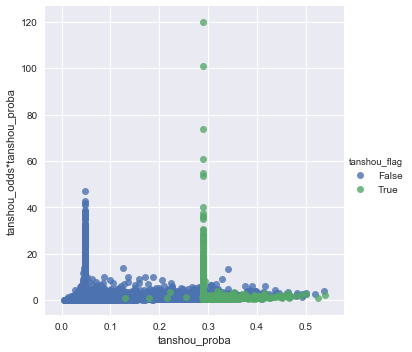

In [75]:
sns.lmplot(data=data_train,x="tanshou_proba",y="tanshou_odds*tanshou_proba", hue="tanshou_flag",fit_reg=False)

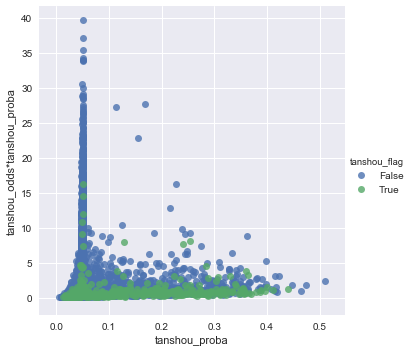

In [77]:
sns.lmplot(data=data_test,x="tanshou_proba",y="tanshou_odds*tanshou_proba", hue="tanshou_flag",fit_reg=False)

trainとtestでなんか違う（要調査）  
testは確率が正しく推定できていないように見える

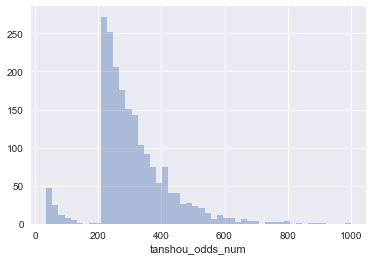

In [71]:
sns.distplot(tr_kaime["tanshou_odds_num"],kde=None)

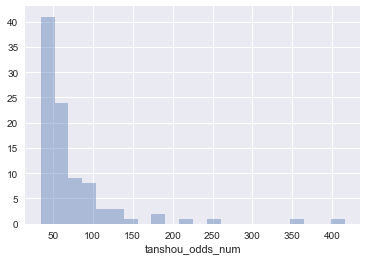

In [72]:
sns.distplot(tr_kaime_TP["tanshou_odds_num"],kde=None)

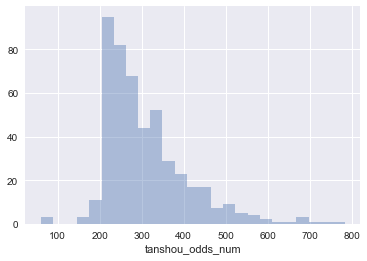

In [73]:
sns.distplot(te_kaime["tanshou_odds_num"],kde=None)

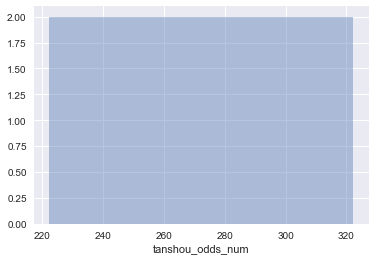

In [74]:
sns.distplot(te_kaime_TP["tanshou_odds_num"],kde=None)

In [87]:
predict_all = grid_search.predict_proba(data.loc[:,features])
print(predict_all.shape)


(28348, 2)


In [88]:
predict_all_df = pd.DataFrame(predict_all)
predict_all_df.head()

,0,1
0,0.951681,0.048319
1,0.952822,0.047178
2,0.951090,0.048910
3,0.952821,0.047179
4,0.957109,0.042891


In [90]:
data.loc[:,"tanshou_proba"] = predict_all_df.loc[:,1]

In [91]:
data.loc[data["raceid"]=="2162201",:]

,racekey,horse_number,horse_name,order_of_finish,popularity,horse_weight,tanshou_odds,hukushou_odds,tanshou_odds_at10,hukushou_odds_at10,...,raceid,order_of_finish_num,popularity_num,horse_weight_num,tanshou_odds_num,tanshou_odds_at10_num,IDM_num,hot_code_num,tanshou_flag,tanshou_proba
0,216220101,1410370320160710,マイネルトルペード,2,4,412,15.8,1.3,14.4,1.4,...,2162201,2,4,412,15.8,14.4,31.0,3.0,False,0.048319
1,216220102,1410026420160710,アントレーン,6,2,418,6.9,1,6.4,1.1,...,2162201,6,2,418,6.9,6.4,18.0,3.0,False,0.047178
2,216220103,1410432120160710,ジャストヒーロー,8,9,458,145.4,10,58.3,10.1,...,2162201,8,9,458,145.4,58.3,11.0,3.0,False,0.048910
3,216220104,1410141620160710,サツキチャン,7,5,408,19.8,1.5,16.4,1.4,...,2162201,7,5,408,19.8,16.4,15.0,3.0,False,0.047179
4,216220105,1410515620160710,サクセスムーン,4,8,442,102.3,7.9,39.1,5.4,...,2162201,4,8,442,102.3,39.1,29.0,3.0,False,0.042891
5,216220106,1410072320160710,マイネルヘミニス,3,3,460,14.5,1.7,12.3,1.7,...,2162201,3,3,460,14.5,12.3,28.0,3.0,False,0.019902
6,216220107,1410167820160710,ピーチメルバ,5,7,452,97.2,7.9,44.4,4.9,...,2162201,5,7,452,97.2,44.4,21.0,3.0,False,0.047183
8,216220109,1410444520160710,エスケークラウン,1,1,492,1.1,1,1.3,1,...,2162201,1,1,492,1.1,1.3,36.0,3.0,True,0.043405


In [60]:
race_list = data.loc[:,"race"].drop_duplicates()
print(race_list.shape)
race_list

(1726,)


0        2162201
9        2162202
21       2162203
37       2162204
50       2162205
59       2162206
74       2162207
86       2162208
97       2162209
108      2162210
122      2162211
134      2162212
147      3162401
162      3162402
172      3162403
188      3162404
203      3162405
217      3162406
232      3162407
248      3162408
263      3162409
279      3162410
294      3162411
310      3162412
321      7163401
334      7163402
352      7163403
382      7163405
394      7163406
410      7163407
          ...   
29461    6151805
29477    6151806
29493    6151807
29509    6151808
29520    6151809
29531    6151810
29547    6151811
29563    6151812
29575    7151301
29591    7151302
29607    7151303
29651    7151306
29669    7151307
29679    7151308
29692    7151309
29706    7151310
29720    7151311
29735    7151312
29752    8151801
29767    8151802
29783    8151803
29798    8151804
29807    8151805
29823    8151806
29839    8151807
29848    8151808
29862    8151809
29876    81518